#Solução via transformada de Laplace

## Setup

In [128]:
import sympy
sympy.init_printing()
import matplotlib.pyplot as plt
%matplotlib inline

t, s = sympy.symbols('t, s')
a = sympy.symbols('a', real=True, positive=True)
w = sympy.symbols('omega', real=True, positive=True)
wn = sympy.symbols('omega_n', real=True, positive=True)
F0 = sympy.symbols('F0', real=True)
m = sympy.symbols('m', real=True)
zeta = sympy.symbols('zeta', real=True)

## Força externa

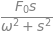

In [129]:
f = F0*sympy.cos(w*t)
display(f)
F = sympy.laplace_transform(f, t, s, noconds=True)
display(F)

## Função de transferência do sistema

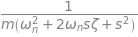

In [130]:
T = 1/(m*(s**2 + 2*zeta*wn*s + wn**2))
display(T)

## Trasformada da resposta

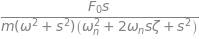

In [131]:
X = T*F
display(X)

Em princípio, poderíamos simplesmente fazer

x = sympy.inverse_laplace_transform(X, s, t)

mas o SymPy é meio lento. Eu interrompi a execução após 20 minutos
de "raciocínio".

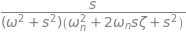

In [132]:
Xd = X*m/F0  # Só para simplificar, depois multiplico de volta
display(Xd)

In [133]:
a1, a2, a3, a4 = sympy.symbols('a_1, a_2, a_3, a_4')

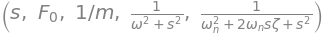

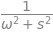

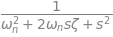

In [134]:
display(X.args)
T1, T2 = X.args[3:5]
display(T1, T2)

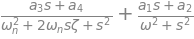

In [135]:
E = (a1*s+a2)*T1 + (a3*s+a4)*T2
display(E)

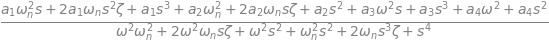

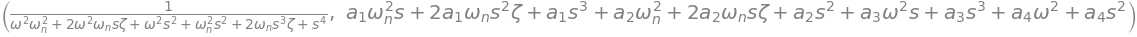

In [136]:
Ec = E.cancel()
display(Ec)
display(Ec.args)
numer = Ec.args[1]

In [137]:
display(numer.collect(s))

In [138]:
p = numer.collect(s)
eql = [p.coeff(s,0),
       p.coeff(s,1)-1,
       p.coeff(s,2) ,
       p.coeff(s,3)]
display(eql)

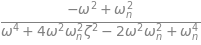

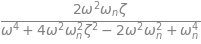

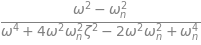

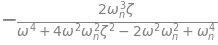

In [139]:
sol = sympy.linsolve(eql, [a1, a2, a3, a4])
r1, r2, r3, r4 = sol.args[0]
display(r1)
display(r2)
display(r3)
display(r4)

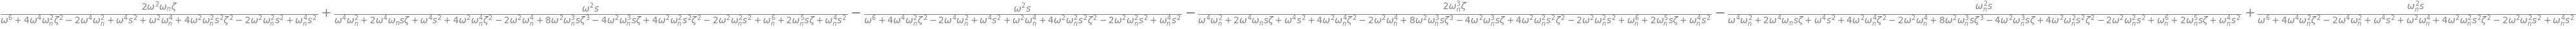

In [140]:
R = E.subs([(a1, r1), (a2, r2), (a3, r3), (a4, r4)]).expand()
display(R)

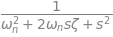

In [ ]:
T1 = 1/R.args[0].args[2].args[0].factor().args[0]
display(T1)
sympy.inverse_laplace_transform(T1, s, t).expand()

### OK, perdi a paciência...